# Problem Statement:

### Given the cardiovascular data with 70k records over 11 parameters, Find the relationship between the dependent and independent feature and predict the outcome that whether the patient will be diagnosed as Cardiovascular disease.

# Dataset 

### Metadata

| SR. | Feature Name                            | Feature Type          | Variable Name | Data Type / Values                                  |
|---|------------------------------------------|-----------------------|----------------|------------------------------------------------------|
| 1 | Age                                     | Objective Feature     | age            | int (days)                                           |
| 2 | Height                                  | Objective Feature     | height         | int (cm)                                             |
| 3 | Weight                                  | Objective Feature     | weight         | float (kg)                                           |
| 4 | Gender                                  | Objective Feature     | gender         | categorical code                                     |
| 5 | Systolic blood pressure                 | Examination Feature   | ap_hi          | int                                                  |
| 6 | Diastolic blood pressure                | Examination Feature   | ap_lo          | int                                                  |
| 7 | Cholesterol                             | Examination Feature   | cholesterol    | 1: normal, 2: above normal, 3: well above normal     |
| 8 | Glucose                                 | Examination Feature   | gluc           | 1: normal, 2: above normal, 3: well above normal     |
| 9 | Smoking                                 | Subjective Feature    | smoke          | binary                                               |
|10 | Alcohol intake                          | Subjective Feature    | alco           | binary                                               |
|11 | Physical activity                       | Subjective Feature    | active         | binary                                               |
|12 | Presence or absence of cardiovascular disease | Target Variable     | cardio         | binary                                               |

### Credit ( Dataset Author)
[Author's Kaggle Profile](https://www.kaggle.com/sulianova)

# Importing Libraries

Managing Required Libs

In [1]:
# !pip install autogluon

In [2]:
# !pip uninstall scikit-learn 

In [3]:
# !pip install scikit-learn==1.7.2

In [4]:
# !pip install autogluon.tabular

In [5]:
import os # To deal OS level operations
import pprint # For prettier printing 
import joblib # Saving model
import itertools # Making combinations
import numpy as np # For fast arrays and mathematical operations 
import pandas as pd # Handling data frame 
import matplotlib.pyplot as plt # Plotting 
import seaborn as sns # Advance plotting 
from scipy.stats import zscore # Z - score

from sklearn.model_selection import (
    train_test_split, # Splitting dataset into training testing 
    StratifiedShuffleSplit, # Balance splitting as per original class proportion
    GridSearchCV # Hyperparameter tuning 
)
from sklearn.preprocessing import StandardScaler # Scaling data 

# ML models
from xgboost import XGBClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

# Metrics of model 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Load the data

In [7]:
# Data folder path 
CARDIOVASCULAR = "data/cardio_train.csv"

# List the files/ sub-folder
# os.listdir('/kaggle/input/')

In [8]:
# Read the file and convert it into a table 
cardio_disease = pd.read_csv(CARDIOVASCULAR, delimiter = ";")

# EDA 

In [9]:
# Checkpoint 
df = cardio_disease.copy() 

In [10]:
# Starting 5 rows 
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [11]:
# Ending 5 rows
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [12]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


##### As it can be observed that there is no null values and all values are qauntitative, which is good for Machine Learning

In [13]:
# Statistics 
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


##### Most of the data are in the range of int 32 or below 

In [14]:
# Deleting ID column
df.drop('id', axis = 1, inplace = True)

In [15]:
# Columns 
df_cols = df.columns

# Removing the Float column
df_cols_int = df_cols.delete(3)

In [16]:
# Converting to lower datatype to save space
df[df_cols_int] = df[df_cols_int].astype('int16')

In [17]:
df['weight'] = df['weight'].astype('float16')

In [18]:
# Datatype
df.dtypes

age              int16
gender           int16
height           int16
weight         float16
ap_hi            int16
ap_lo            int16
cholesterol      int16
gluc             int16
smoke            int16
alco             int16
active           int16
cardio           int16
dtype: object

In [19]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int16  
 1   gender       70000 non-null  int16  
 2   height       70000 non-null  int16  
 3   weight       70000 non-null  float16
 4   ap_hi        70000 non-null  int16  
 5   ap_lo        70000 non-null  int16  
 6   cholesterol  70000 non-null  int16  
 7   gluc         70000 non-null  int16  
 8   smoke        70000 non-null  int16  
 9   alco         70000 non-null  int16  
 10  active       70000 non-null  int16  
 11  cardio       70000 non-null  int16  
dtypes: float16(1), int16(11)
memory usage: 1.6 MB


#### The original size was 6.9 MB, now the size is 1.6 MB.

In [20]:
# Null values 
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [21]:
# Duplicated 
df.duplicated().sum()

np.int64(24)

##### There are 24 duplicates present in the dataset

In [22]:
# (No. of rows, No. of columns)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Rows: 70000, Columns: 12


In [23]:
# Number of cells
df.size

840000

In [24]:
# Columns
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [25]:
# Dropping Duplicated instances 
df.drop_duplicates(inplace = True)

In [26]:
# Shape after deletion of duplicated rows 
df.shape

(69976, 12)

In [27]:
# Duplicate delete confimation
df.duplicated().sum()

np.int64(0)

In [28]:
# Correlation
pd.DataFrame({"Correlation": df.corr().loc['cardio', :].sort_values(ascending=False)})

,Correlation
cardio,1.000000
age,0.238189
cholesterol,0.221119
weight,0.181599
gluc,0.089268
ap_lo,0.065717
ap_hi,0.054475
gender,0.008037
alco,-0.007366
height,-0.010871


## Data Visualization

In [29]:
# # Adjacency plots
# pd.plotting.scatter_matrix(df, alpha=.5, figsize=(20, 16))
# plt.show()

##### Takeaway
1. Imbalance in unique values of features
2. Target is perfectly balanced

###### To view visualization more clearly, lets focus on top 5 correlated features

In [30]:
# Top 5 high correlated values 
df_cols_top_5_corr = df.corr().loc['cardio', :].sort_values(ascending=False)[:7].index

In [31]:
# # Adjacency plot with less columns but correlated
# pd.plotting.scatter_matrix(df[df_cols_top_5_corr], figsize=(12, 9))
# plt.show()

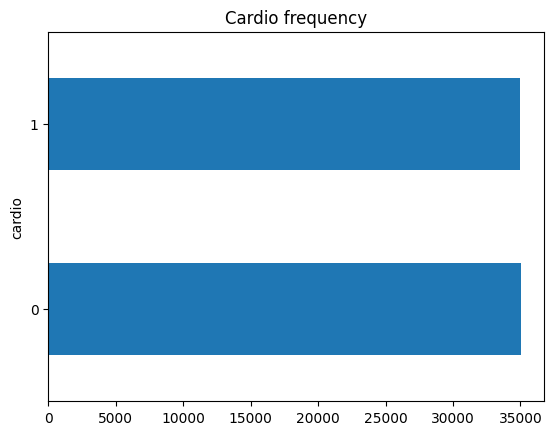

In [32]:
# Bar plot 
df['cardio'].value_counts().plot(kind="barh")
plt.title("Cardio frequency")
plt.show()

Thankfully, The target column have balance. However, The balance is not seen in other category of feature.

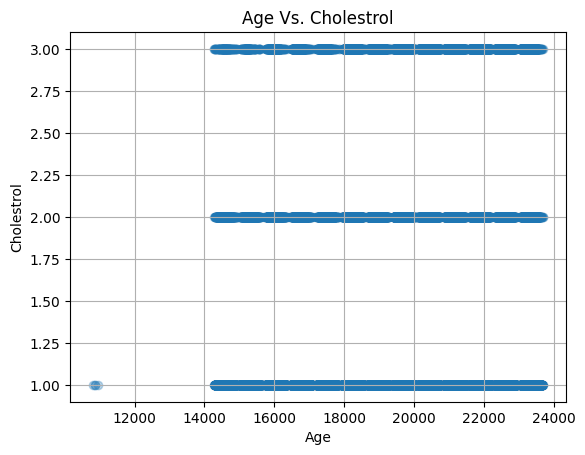

In [33]:
# Relation between Age and Cholestrol
plt.scatter(df['age'], df['cholesterol'], alpha=.3)
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.title("Age Vs. Cholestrol")
plt.grid()
plt.show()

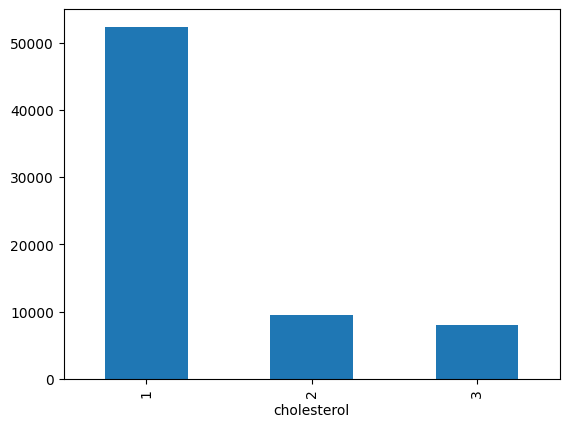

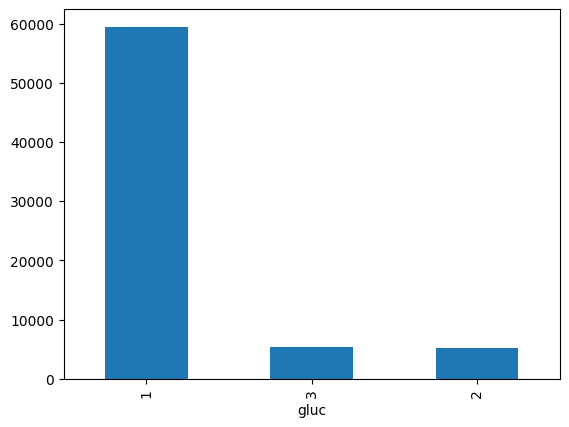

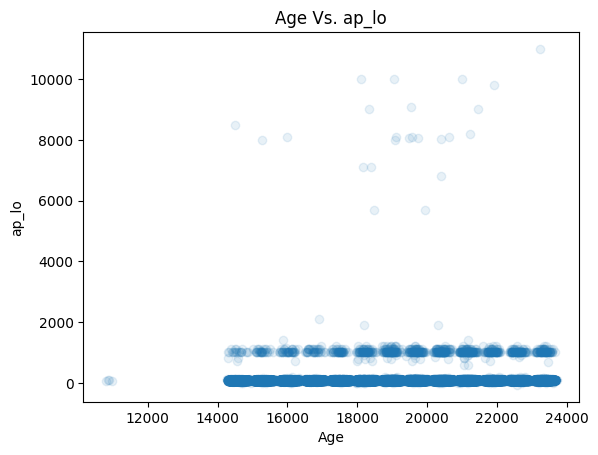

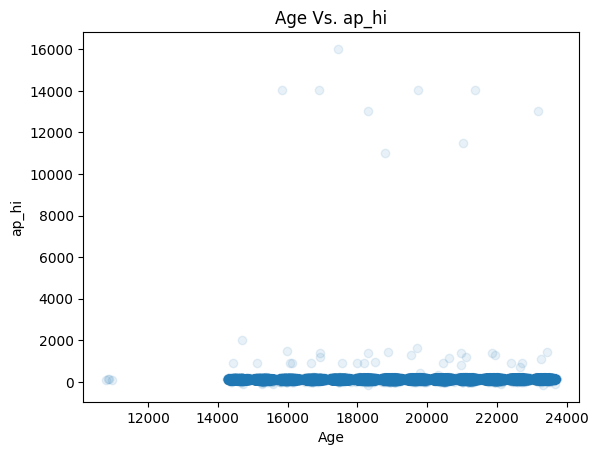

In [34]:
# Relationship of Age with related columns
for col in ['cholesterol', 'gluc', 'ap_lo', 'ap_hi']:
    if col == 'ap_lo' or col == 'ap_hi':
        plt.scatter(df['age'], df[col], alpha=0.1)
        plt.xlabel('Age')
        plt.ylabel(f"{col}")
        plt.title(f"Age Vs. {col}")
        plt.show()
    else:
        df[col].value_counts().plot(kind="bar")
        plt.show()

##### Takeaway
1. Relationship of ap_hi & ap_lo with Age seems random
2. Feature imbalance is seen.


In [35]:
# Looking at dataset
df

D:\NCI\SEM 1\Data Mining and ML\Project\cardio_xgb\venv\Lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


We will go with two approaches:
1. Go for ML with all variables.
2. Go for ML with highly important features.

# Machine Learning

* All variables included -- Fast & Greedy Approach 

## Data

In [36]:
# Numpy
X = df.drop('cardio', axis=1).values
y = df['cardio'].copy().values

In [37]:
# Shape of X & y 
print(f"X: {X.shape}, y: {y.shape}")

X: (69976, 11), y: (69976,)


## Splitting data

In [38]:
# Data split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# Shape of train and test subdataset after split 
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (55980, 11), X_test: (13996, 11)
y_train: (55980,), y_test: (13996,)


In [40]:
# Check whether split is proportional to actual population or not
sum(y_train == 1)/ len(y_train)

np.float64(0.4979814219364059)

##### This perfectly resembles the actual proportion

In [41]:
# Actual 
sum(df['cardio'] == 1) / len(df)

0.4997713501772036

If a survey is going to ask to male and female some questions, they not just randomly pull out the survey people. Rather, they try to resemble the sample proportion with the population. For an instance, if a country have 51% females and 49% males, and a sample of 100 people is needed, then a good sample will be a sample which will cover 51 females and and 49 males. 

There may be a 12% chance that random sampling can yield skewed data. <sup>[1]</sup>

> [1]: Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow by Aurelien, published O'REILLY

In [42]:
# Example of Stratified Sampling
split = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)

for train_strat_index, test_strat_index in split.split(X, y):
    strat_train_set = X[train_strat_index]
    strat_test_set = y[test_strat_index]

In [43]:
# Check whether split is proportional to actual population or not
sum(strat_test_set == 1) / len(strat_test_set)

np.float64(0.4997856530437268)

In [44]:
# Test set 
strat_test_set

array([0, 1, 1, ..., 1, 1, 0], shape=(13996,), dtype=int16)

##### As we can see above, it perfectly resembles the population proportion

##### We will proceed with traintest split as it contains almost same proportion and is easy to work with due to simplicity.

## Models

In [45]:
# Starting with default models
models = {
    'lr': LogisticRegression(max_iter=1000),
    'knn': KNeighborsClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'bnb': BernoulliNB(),
    'svc': SVC()
}

## Model Training 

In [46]:
# Calculates execution time
def timer(func):
    def wrapper(*args, **kwargs):
        import time
        start = time.time()
        result = func(*args, **kwargs)
        print(f"Time {func.__name__} ran in {time.time() - start:.3f}s")
        return result
    return wrapper

In [47]:
# Functio for model fitting 
@timer
def model_train(models: dict, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> dict:
    '''
        Input: 
            models: A dictionary of all model to be trained,
            X_train: A ndarray of features values for training set,
            X_test: A ndarray of features values for testing set,
            y_train: A ndarray of target values for training set,
            y_test: A ndarray of target values for testing set,

        Output:
            dict: A dictionary containing accuracy of models

        Examples: 
        >> results = model_train(models, X_train, y_train, X_test, y_test)

        O/p: 
        >> {....}
    '''
    accuracies = dict()
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[model_name] = accuracy

    return accuracies

In [48]:
# Result 
results = model_train(models, X_train, y_train, X_test, y_test)
print(results)

D:\NCI\SEM 1\Data Mining and ML\Project\cardio_xgb\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Time model_train ran in 123.465s
{'lr': 0.7049871391826236, 'knn': 0.6861246070305802, 'dtc': 0.6323949699914261, 'rfc': 0.7117033438125179, 'bnb': 0.5101457559302658, 'svc': 0.609031151757645}


Logistic Regression and Random Forest works quite well. Let's explore them
> Logistic Regression: ~70% </br>
> Random Forest: ~71%

## Model Evaluation Elaborated

In [49]:
# Logistic Regression Metrics
print("#"*50 + "\nLogistic Regression\n" + "#"*25)
# Accuracy 
print(f"Accuracy: {accuracy_score(y_test, models['lr'].predict(X_test))}")

# Confusion Matrix
#                       Actual
#            __________________________
#           |      Pos    |      Neg  |
#           ___________________________  
#           | POS | Tp     |      FP  |
# Predicted ___________________________  
#           | Neg | FN     |      TN  |
#           ---------------------------
TP = sum((y_test == 1) & (models['lr'].predict(X_test) == 1))
TN = sum((y_test == 0) & (models['lr'].predict(X_test) == 0))
FP = sum((y_test == 0) & (models['lr'].predict(X_test) == 1))
FN = sum((y_test == 1) & (models['lr'].predict(X_test) == 0))

print(f"""\nConfusion Matrix: 
                       Actual
            __________________________
           |      Pos    |      Neg  |
           ___________________________  
           | POS | {TP}  |      {FP} |
 Predicted ___________________________  
           | Neg | {FN}  |      {TN} |
           --------------------------- 
""")


# Classification Report 
print("Classification Report: " + "\n" + classification_report(y_test, models['lr'].predict(X_test)))

# Random Forest Metrics
print("#"*50 + "\nRandom Forest\n" + "#"*25)
# Accuracy 
print(f"Accuracy: {accuracy_score(y_test, models['rfc'].predict(X_test))}")

# Confusion Matrix
#                       Actual
#            __________________________
#           |      Pos    |      Neg  |
#           ___________________________  
#           | POS | Tp     |      FP  |
# Predicted ___________________________  
#           | Neg | FN     |      TN  |
#           ---------------------------
TP = sum((y_test == 1) & (models['rfc'].predict(X_test) == 1))
TN = sum((y_test == 0) & (models['rfc'].predict(X_test) == 0))
FP = sum((y_test == 0) & (models['rfc'].predict(X_test) == 1))
FN = sum((y_test == 1) & (models['rfc'].predict(X_test) == 0))

print(f"""\nConfusion Matrix: 
                       Actual
            __________________________
           |      Pos    |      Neg  |
           ___________________________  
           | POS | {TP}  |      {FP} |
 Predicted ___________________________  
           | Neg | {FN}  |      {TN} |
           --------------------------- 
""")


# Classification Report 
print("Classification Report: " + "\n" + classification_report(y_test, models['rfc'].predict(X_test)))

##################################################
Logistic Regression
#########################
Accuracy: 0.7049871391826236

Confusion Matrix: 
                       Actual
            __________________________
           |      Pos    |      Neg  |
           ___________________________  
           | POS | 4701  |      1735 |
 Predicted ___________________________  
           | Neg | 2394  |      5166 |
           --------------------------- 

Classification Report: 
              precision    recall  f1-score   support

           0       0.68      0.75      0.71      6901
           1       0.73      0.66      0.69      7095

    accuracy                           0.70     13996
   macro avg       0.71      0.71      0.70     13996
weighted avg       0.71      0.70      0.70     13996

##################################################
Random Forest
#########################
Accuracy: 0.7117033438125179

Confusion Matrix: 
                       Actual
            ____________

# Model Improvement 

## Important Features Selection

In [50]:
# Checking for important feature using GINI criteria of RFC
importance = pd.DataFrame({"Features": df.drop("cardio", axis=1).columns,"Gini Importance": models['rfc'].feature_importances_}, index = range(1, len(df.columns)))
desc_imp = importance.sort_values(by = "Gini Importance", ascending = False)
desc_imp.index = np.arange(1, len(df.columns))

display(desc_imp)

,Features,Gini Importance
1,age,0.306546
2,weight,0.173022
3,ap_hi,0.169203
4,height,0.156289
5,ap_lo,0.095061
6,cholesterol,0.039174
7,gluc,0.017104
8,gender,0.015705
9,active,0.012156
10,smoke,0.008677


As seen from the above imporance table, Age is highly important for Disease detection, which make sense. With that, ap_hi, weight, height all are above 0.15 in important. From ap_lo, all the way down, it can be seen that the importance is merely negligible or very little. Alcohol, Smoke and Active have negligible importance. It is noteworthy that the dataset contains three types of information as per the author: 
1. Objective: factual information;
2. Examination: results of medical examination;
3. Subjective: information given by the patient.
This might be due the reason of subjective data. However, with such size of data, it is effective to work for machine learning.

Point to be noted:
1. Cholesterol correlation was in top 3, however, gini importance is lower, this can be due to split assistance.

Moving further, we will consider top 5 important feature for better model training. Training model with features less important doesn't make a difference in training. Rather, in some cases, it worsen the training, as giving unimportant data, might confuse the model.

In [51]:
# Top 5 Important features
imp_cols = desc_imp.loc[:5, "Features"].values
imp_cols

array(['age', 'weight', 'ap_hi', 'height', 'ap_lo'], dtype=object)

## Resplitting the data 

In [52]:
# Feature Selection
X_imp_feature = df[imp_cols].values # To numpy 
X_imp_feature[:5, :]

array([[18393.,    62.,   110.,   168.,    80.],
       [20228.,    85.,   140.,   156.,    90.],
       [18857.,    64.,   130.,   165.,    70.],
       [17623.,    82.,   150.,   169.,   100.],
       [17474.,    56.,   100.,   156.,    60.]], dtype=float32)

In [53]:
# Shape of updated X 
X_imp_feature.shape

(69976, 5)

##### Now, as it can be observe, the age columns have age in days. We will scale it to year.

In [54]:
# Converting Age from days to year upto two decimal places
X_imp_feature[:, 0] = np.round((X_imp_feature[:, 0]/365), 2)

In [55]:
# Updated X after updated age column
X_imp_feature

array([[ 50.39,  62.  , 110.  , 168.  ,  80.  ],
       [ 55.42,  85.  , 140.  , 156.  ,  90.  ],
       [ 51.66,  64.  , 130.  , 165.  ,  70.  ],
       ...,
       [ 52.24, 105.  , 180.  , 183.  ,  90.  ],
       [ 61.45,  72.  , 135.  , 163.  ,  80.  ],
       [ 56.27,  72.  , 120.  , 170.  ,  80.  ]],
      shape=(69976, 5), dtype=float32)

## **Standard Scaling**

z = (x - mean) / std_dev

In [56]:
# Scaling the data 
std_scaler = StandardScaler()
std_scaler.fit(X_imp_feature)

# Stats before scaling 
X_mean = std_scaler.mean_
X_std_dev = std_scaler.scale_

# Mean 
print("Mean of Original X features: ", X_mean)

# Standard Deviation 
print("Standard deviation of Original X features: ", X_std_dev)

X_std_scaled = std_scaler.transform(X_imp_feature)

print(X_std_scaled)

Mean of Original X features:  [ 53.33957957  74.20851792 128.82045273 164.35915171  96.636261  ]
Standard deviation of Original X features:  [  6.7598618   14.39710935 154.03662853   8.21115961 188.50323362]
[[-0.43633735 -0.84798396 -0.12218168  0.44340247 -0.08825451]
 [ 0.3077605   0.7495589   0.0725772  -1.0180233  -0.03520503]
 [-0.24846362 -0.7090672   0.00765758  0.07804602 -0.141304  ]
 ...
 [-0.16266277  2.1387267   0.3322557   2.2701845  -0.03520503]
 [ 1.199791   -0.15340011  0.04011739 -0.16552494 -0.08825451]
 [ 0.43350306 -0.15340011 -0.05726205  0.6869734  -0.08825451]]


In [57]:
# Shape 
X_imp_feature.shape

(69976, 5)

In [58]:
# Shape 
y.shape

(69976,)

In [59]:
# Coming back to splitting
X_imp_feature_scaled_train, X_imp_feature_scaled_test, y_feature_scaled_train, y_feature_scaled_test = train_test_split(X_std_scaled, y, test_size = .15, random_state=42)

# Shapes
print(f"X_imp_feature_train: {X_imp_feature_scaled_train.shape}")
print(f"X_imp_feature_test: {X_imp_feature_scaled_test.shape}")
print(f"y_train: {y_feature_scaled_train.shape}")
print(f"y_test: {y_feature_scaled_test.shape}")

# Data
print(f"X imp feature scaled: \n{X_imp_feature_scaled_train}")

X_imp_feature_train: (59479, 5)
X_imp_feature_test: (10497, 5)
y_train: (59479,)
y_test: (10497,)
X imp feature scaled: 
[[-0.11828329 -0.29231688  0.00765758 -1.6269507  -0.141304  ]
 [ 1.5784972  -0.22285849  0.0725772   0.80875885 -0.03520503]
 [ 1.6968421  -0.57015043  0.0725772  -1.0180233  -0.03520503]
 ...
 [-0.08573863  0.61064214 -0.05726205  1.2959008  -0.08825451]
 [-0.50290686 -0.29231688 -0.05726205  0.32161698 -0.08825451]
 [ 0.05035913 -0.15340011 -0.05726205  0.07804602 -0.08825451]]


In [60]:
# Splits 
X_imp_feature_train, X_imp_feature_test, y_imp_feature_train, y_imp_feature_test = train_test_split(X_imp_feature, y, test_size=.15, random_state=42)

# Shapes
print(f"X_imp_feature_train: {X_imp_feature_train.shape}")
print(f"X_imp_feature_test: {X_imp_feature_test.shape}")
print(f"y_train: {y_imp_feature_train.shape}")
print(f"y_test: {y_imp_feature_test.shape}")

# Data
print(f"X imp feature: \n{X_imp_feature}")

X_imp_feature_train: (59479, 5)
X_imp_feature_test: (10497, 5)
y_train: (59479,)
y_test: (10497,)
X imp feature: 
[[ 50.39  62.   110.   168.    80.  ]
 [ 55.42  85.   140.   156.    90.  ]
 [ 51.66  64.   130.   165.    70.  ]
 ...
 [ 52.24 105.   180.   183.    90.  ]
 [ 61.45  72.   135.   163.    80.  ]
 [ 56.27  72.   120.   170.    80.  ]]


In [61]:
# Verifying the split balance -- Imp Feature
print(f"Y_train records for disease: {round((sum(y_imp_feature_train == 1) / len(y_imp_feature_train)) * 100, 2)}%")
print(f"Y_test records for disease: {(round(sum(y_imp_feature_test == 1) / len(y_imp_feature_test) * 100, 2))}%")

Y_train records for disease: 49.85%
Y_test records for disease: 50.7%


The data is balancely splitted

## Better model selection

## Model Training 

In [62]:
# Current Better model 
better_model = {
    "lr": LogisticRegression(max_iter=1000),
    "rfc": models["rfc"]
    }

In [63]:
# Results 
print("#"*50 + "\nOn Scaled Important Feature\n" + "#"*50)
results_scaled_imp = model_train(better_model, X_imp_feature_scaled_train, y_feature_scaled_train, X_imp_feature_scaled_test, y_feature_scaled_test) # Model fitting on scaled and important feature
print(results_scaled_imp)

print("\n\n\n")
print("#"*50 + "\nOn Important Feature\n" + "#"*50)
results_imp = model_train(better_model, X_imp_feature_train, y_imp_feature_train, X_imp_feature_test, y_imp_feature_test) # Model fitting on scaled and important feature
print(results_imp)

##################################################
On Scaled Important Feature
##################################################
Time model_train ran in 6.197s
{'lr': 0.7064875678765361, 'rfc': 0.6921977707916548}




##################################################
On Important Feature
##################################################
Time model_train ran in 6.342s
{'lr': 0.7066780985043346, 'rfc': 0.6937220158140421}


##### As it can be observe, Logistic Regression out perform the RFC model with almost around 1%.

##### Also, This indicates that scaling is not needed. However, in this case, neither benefitting nor lossing significantly

## Model Evaluation

In [64]:
# Accuracy of Outperforming model 
print(f"Model accuracy: {(accuracy_score(y_imp_feature_test, (better_model['lr'].predict(X_imp_feature_test))) * 100):.2f}%")

Model accuracy: 70.67%


##### Same accuracy is observed

## Hyperparameter tuning of Outperforming model

We will use GridSearchCV for this. Also, we will stick with Imp feature data original (not scaled).

In [65]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

In [66]:
# Data look
X_imp_feature_test

array([[ 53.92,  85.  , 130.  , 152.  ,  80.  ],
       [ 43.7 ,  60.  , 110.  , 165.  ,  80.  ],
       [ 55.99,  76.  , 110.  , 152.  ,  70.  ],
       ...,
       [ 42.51,  59.  , 120.  , 160.  ,  80.  ],
       [ 62.54,  76.  , 120.  , 164.  ,  80.  ],
       [ 54.53,  73.  , 120.  , 169.  ,  90.  ]],
      shape=(10497, 5), dtype=float32)

In [67]:
# Data look
y_imp_feature_test

array([1, 0, 1, ..., 0, 0, 0], shape=(10497,), dtype=int16)

In [68]:
# Perform grid search
grid_search = GridSearchCV(estimator = better_model["lr"],
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

In [69]:
# Search
# grid_search.fit(X_imp_feature_train, y_imp_feature_train)

In [70]:
# class GridSearchSelf:
#     def __init__(self, X_train: np.ndarray, X_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray, params: dict, model: str):
#         '''
#             GridSearch Class for working with Hyperparameter tuning

#             Input:
#             X_train: A numpy ndarray of train feature,
#             X_test: A numpy ndarray of test feature,
#             y_train: A numpy ndarray of train target,
#             y_test: A numpy ndarray of test target

#             Output:
#             Best model, Best argument, Best score

#             Example:
#             gd = GridSearchSelf(
#                 X_train, X_test, y_train, y_test, params = {...}, model = "..."
#             )
#             best_model, best_accuracy, best_params = gd.find()
#         '''
#         self.X_train = X_train
#         self.X_test = X_test
#         self.y_train = y_train
#         self.y_test = y_test
#         self.params = params
#         self.best_score_ = None
#         self.best_params_ = dict()
#         self.model = model
#         self.score = "accuracy"
        
#     def fit(self):
#         self.model.fit(self.X_train, self.y_train)

#     def eval(self) -> float:
#         acc = accuracy_score(self.y_train, self.model.predict(self.X_test))
#         return acc

#     def find(self):
#         list_of_params = list(self.params.values())
#         params_combinations = list(itertools.product(*list_of_params))
#         accs = dict()

#         a, b, c = *list(self.params.keys())
#         # Iterate each params unpack and take them. keys same for each iteration, only value change
#         for _, i, j, k in enumerate(params_combination):
#             self.model = LogisticRegression(a = i, b = j, c = k)
#             self.fit()
#             acc = self.eval()
#             accs[f'mod_{i}'] = [].append({
#                 "acc": acc,
#                 "params": {
#                     a: i,
#                     b: j, 
#                     c: k
#                 }
#             })

#         # To-dos:
#         # 1. Compare each accs
#         # 2. Pick the highest acc params
#         # 3. Update best params & best score attribute
#         # 4. Create a best model and return
        

In [73]:
# # Report best score and parameters
# print(f"Best score: {grid_search.best_score_:.3f}")
# print(f"Best parameters: {grid_search.best_params_}")

In [74]:
# # Evaluate on test set
# best_model = grid_search.best_estimator_
# accuracy = best_model.score(X_imp_feature_test, y_imp_feature_test)
# print(f"Test set accuracy: {accuracy:.3f}")

##### After hyperparameter tuning, the accuracy seems to increase just negligible amount. This might be due to less max_iter value. As it says, loop ends before function would converge. So, lets consider this params and increase the max_iter

In [75]:
# Updated model 
f_model_1 = LogisticRegression(C = 10, penalty = 'l1', solver = 'liblinear', max_iter = 10000, n_jobs = -1)

In [76]:
# Fitting 
f_model_1.fit(X_imp_feature_train, y_imp_feature_train)

# Evaluate 
y_hat = f_model_1.predict(X_imp_feature_test)
accuracy = accuracy_score(y_imp_feature_test, y_hat)
print(f"Accuracy: {(accuracy * 100):.3f}%")

D:\NCI\SEM 1\Data Mining and ML\Project\cardio_xgb\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


Accuracy: 70.658%


##### No improvement in model's performance. Let's proceed with another model -- XGBoost

## XGBOOST

In [77]:
# Model object 
xgbc = XGBClassifier()

# Fitting
xgbc.fit(X_imp_feature_train, y_imp_feature_train)

# Evaluate 
y_hat = xgbc.predict(X_imp_feature_test)
accuracy = accuracy_score(y_imp_feature_test, y_hat)
print(f"Accuracy: {(accuracy * 100):.3f}%")

Accuracy: 72.097%


##### A slight improve model is seen above. Let's try to improve the above model.
1. We will use top 4 features (importance above 15) and evaluate the performance (Age, ap_hi, Weight, & Height)
2. Will use the scaled data, not letting model be fooled by lower important feature due to it's high value than most important feature.

In [78]:
# X_train_f_updated_1 = X_imp_feature_scaled_train[:, :4]
# X_test_f_updated_1 = X_imp_feature_scaled_test[:, :4]

In [79]:
# xgbc.fit(X_train_f_updated_1, y_imp_feature_train)
# accuracy_score(y_imp_feature_test, xgbc.predict(X_test_f_updated_1))

##### Model performance deteriorate. Hence, we will go with Hyperparameter tuning.

Expected time of below code:
No of values :
1. Regalpha = 4
2. subsample = 3
3. colsample_bytree = 3
4. gamma = 5
5. max_depth = 4
6. max_child_weight = 3

Total combinations:
4 * 3 * 3 * 5 * 4 * 3 = 2,160

Total possibility = total_combinations * cross_val = 2160 * 2 = 4,320

Each model might take 3 second

Total time in seconds = 4320 * 3 = 12,960 secs
Total time in hours = total_time_secs / 3,600 = 3 hours 36 mins

## Hyperparameter Tuning of XGBoost

In [80]:
# xg_params = {
#     'reg_alpha':[1e-5, 1e-2, 0.1, 100],
#     'subsample':[i/100.0 for i in range(75,90,5)],
#     'colsample_bytree':[i/100.0 for i in range(75,90,5)],
#     'gamma':[i/10.0 for i in range(0,5)],
#     'max_depth':range(3,10,2),
#     'min_child_weight':range(1,6,2),
# }

# gsearch = GridSearchCV(
#     estimator = XGBClassifier(learning_rate =0.1,
#                               n_estimators=10,
#                               max_depth=5,
#                               min_child_weight=2,
#                               gamma=0.1,
#                               subsample=0.85,
#                               colsample_bytree=0.8,
#                               objective= 'binary:logistic',
#                               nthread=4,
#                               scale_pos_weight=1,
#                               seed=27), 
#     param_grid = xg_params,
#     scoring='accuracy',
#     n_jobs=-1,
#     cv=2,
#     verbose=10) # Close of GridSearch

# gsearch.fit(X_train_f_updated_1, y_imp_feature_train)
# # accuracy_score(y_imp_feature_test, xgbc.predict(X_test_f_updated_1))

In [81]:
# # Best parameters 
# gsearch.best_params_

In [82]:
# # Best score 
# print(f"Best Accuracy: {(gsearch.best_score_ * 100):.3f}%")

##### Model gain accuracy hardly by .1%. This model means, there is a chance of predicting wrong in every 1 case out of 3. The accuracy is not at all good.

##### But it is better, as out of ten patients, 7 will get be answered correctly.

##### Future scope

Due to high incompatability & conflict autogluon can't fit here.
So, to achieve that we will be doing that in a seperate notebook in future

# Dump

In [122]:
joblib.dump(xgbc, "model/xgb_model_finetune.joblib")

['model/xgb_model_finetune.joblib']

# Load test

In [123]:
# loaded_model = joblib.load("/kaggle/working/xgb_model_finetune.joblib")

# StreamLit App

In [124]:
# !pip install streamlit

In [127]:
%%writefile app.py
# Importing libs 
import streamlit as st
import joblib
import pandas as pd
import time

# Load model
def load_model(path):
    return joblib.load(path)

model = load_model("model/xgb_model_finetune.joblib")

# Streamlit app 
st.title("Cardiovascular Disease Risk Predictor")
st.subheader("Highly trained model on important features to predict the risk of cardiovascular disease")
st.header("About Dataset:")
st.subheader("A dataset based on 70k real patient history and outcome")
st.header("About Model")
st.subheader("Multiple model was trained after feature selection based on Gini importance and the best model was finetuned and is presented here")

st.metric(label="XGBoost Feature Selected Fine Tuned Model", value="73%", delta="3%")

# Data Collection
age = st.number_input("Age (years)", min_value=1, max_value=120, value=30)
height = st.number_input("Height (cm)", min_value=50, max_value=250, value=170)
weight = st.number_input("Weight (kg)", min_value=10, max_value=300, value=70)
ap_hi = st.number_input("Systolic Blood Pressure (ap_hi)", min_value=50, max_value=250, value=120)
ap_lo = st.number_input("Diastolic Blood Pressure (ap_lo)", min_value=30, max_value=150, value=80)

# Input data config
input_data = [[age, height, weight, ap_hi, ap_lo]]

# Prediction
if st.button("Predict"):
    prediction = model.predict(input_data)
    risk = "High Risk of Cardiovascular Disease" if prediction[0] == 1 else "Low Risk of Cardiovascular Disease"
    
    # Show and update progress bar for managing delay with model calculation
    bar = st.progress(33)
    time.sleep(0.5)
    bar.progress(66)
    time.sleep(0.5)
    bar.progress(100)

    with st.status("Analyzing...") as s:
        time.sleep(0.5)
        st.write("Almost done...")
        s.update(label="Done")
    
    if prediction[0] == 1:
        st.markdown(
            "<div style='padding: 12px; background-color:#ffcccc; color:; "
            "border-radius:8px; font-size:20px;'><b>High Risk of Cardiovascular Disease</b></div>",
            unsafe_allow_html=True
        )
    else:
        st.markdown(
            "<div style='padding: 12px; background-color:#ccffcc; color:#006600; "
            "border-radius:8px; font-size:20px;'><b>Low Risk of Cardiovascular Disease</b></div>",
            unsafe_allow_html=True
        )

Overwriting app.py


In [ ]:
!streamlit run app.py

# Requirements.txt

In [ ]:
!pip freeze > requirements.txt

# To-dos

- [x] Try improving the model with other methods such as **Removing and analysing outliers** -- Not needed as patient can be unique 
- [X] Use **XGboost** using gpu_hist, gpu_predictors, n_gpus (First check !nvidia-smi)
- [x] AutoGluon
- [x] If not, conclude and deploy locally using **Streamlit**
- [ ] Upload on **GitHub**
- [ ] Make a **Report**
- [ ] Collaborate

### References 
1. https://www.statology.org/optimizing-scikit-learn-models-for-better-performance/
2. https://pmc.ncbi.nlm.nih.gov/articles/PMC11505330/#sec3-bioengineering-11-01039
3. https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
4. https://pypi.org/project/autogluon/